# Baseline Model

In [ ]:

#hide
!fusermount -u drive
!google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive')

fusermount: failed to unmount /content/drive: No such file or directory
/bin/bash: google-drive-ocamlfuse: command not found
Mounted at /content/drive


In [ ]:
#!pip install torch
#!pip install pytorch
#!pip install torchvision
#!pip install fastai
!pip3 install git+https://github.com/fastai/fastai.git 
!pip install -Uqq fastbook

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-bxxqs3wn
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-bxxqs3wn
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 12.8MB 205kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
  Created wheel for fastai: filename=fastai-2.3.1-cp37-none-any.whl size=192725 sha256=f8b39e7df8264d11e734af5d48c390f0de2c5fbc9a6df37aad66c7e9255b6c5c
  Stored in directory: /tmp/pip-ephem-wheel-cache-hqpkyuz4/wheels/cf/46/39/b2d08762125ed2376861976ab2c4ac30c029b86e375735d9b8
Successfully built fastai
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully un

In [ ]:
#hide
import PIL
from PIL import Image 
import os
import requests
import torch
import pandas as pd
import fastbook
from fastai.vision.widgets import *
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
#hide
import requests
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
#path = Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed')
rootPath = glob.glob(os.path.join(os.getcwd(), "gdrive/MyDrive/**/AI_reCaptcha v2/"), recursive=true)[0]
path = os.path.join(rootPath, "recaptcha-dataset-main/trimmed/")
path

In [ ]:
fns = get_image_files(path)
fns

(#223) [Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (9).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (20).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (10).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (16).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (15).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (6).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/AI Machinelearning/AI_reCaptcha v2/recaptcha-dataset-main/trimmed/Bicycle/Bicycle (2).png'),Path('gdrive/MyDrive/PBA Softwareudvikling/

In [ ]:
def get_y(r): return L(parent_label(r))
#Vi prøvede først at lave vores egen måde at loade filer ind for at begrænse datasettet
# def get_image_files_by_size(path, sample_size = 200): 
#   return list(get_image_files(path))[:sample_size]

In [ ]:
ys = []
for i in get_image_files(path):
  ys.append(get_y(i))
ys

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock), 
    get_items = get_image_files, 
    get_y = get_y, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(path)

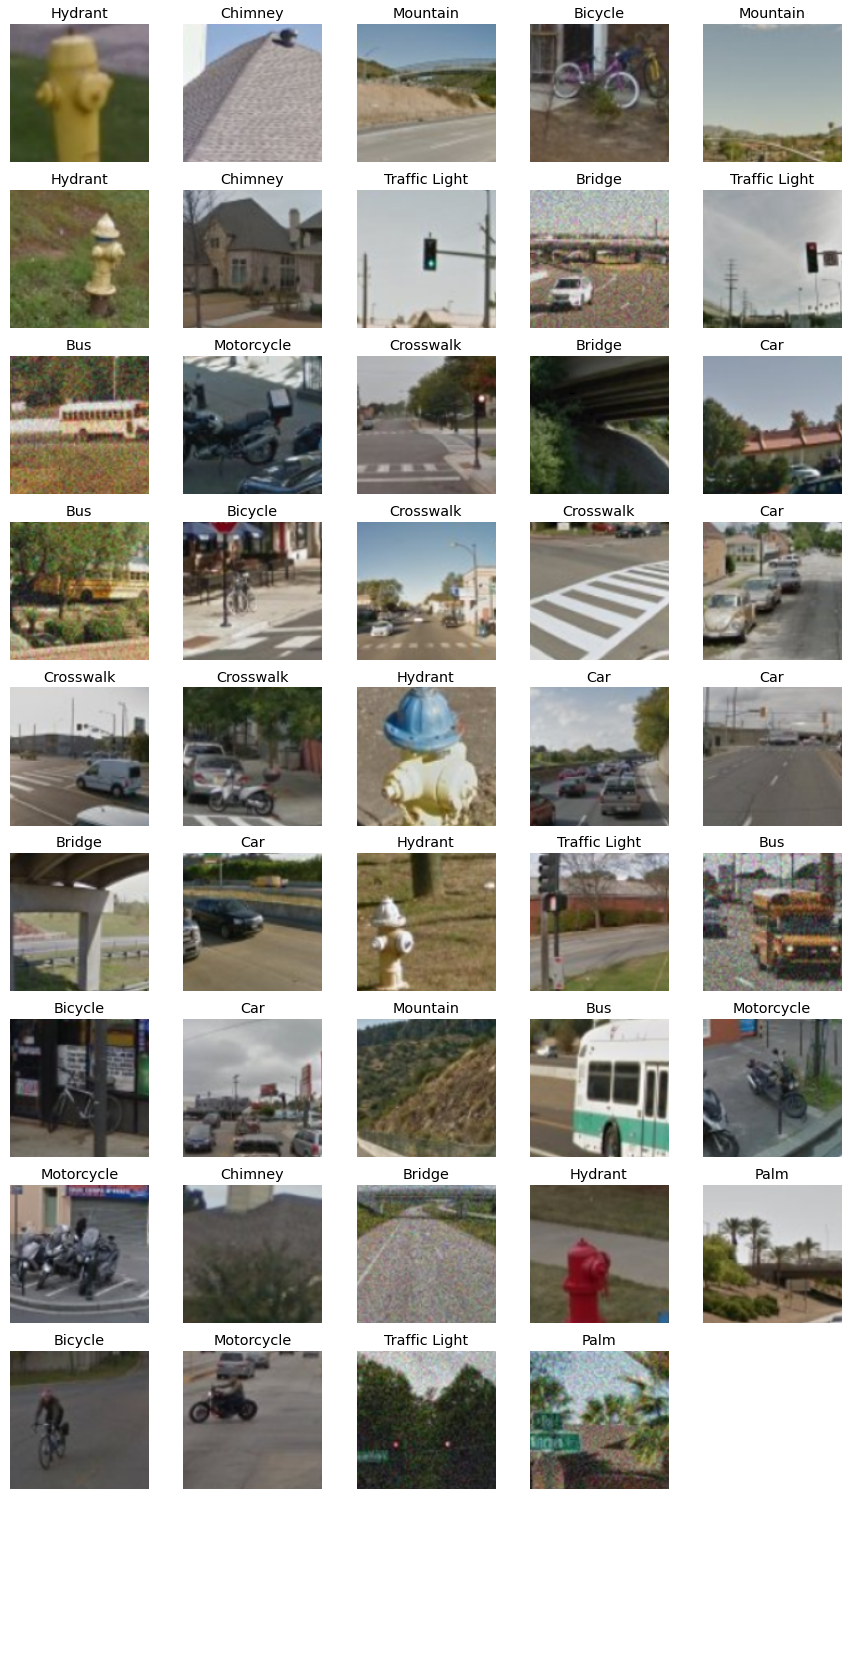

In [ ]:
dls.valid.show_batch(max_n=200, nrows=10)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=  )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.fine_tune(20, base_lr=8.32e-03)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.495408,0.626817,0.776859,00:01


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.480477,0.505737,0.799587,00:01
1,0.439666,0.468965,0.816116,00:01
2,0.431645,0.466094,0.826446,00:01
3,0.423222,0.465097,0.847107,00:01
4,0.401796,0.460655,0.863636,00:01
5,0.386039,0.416572,0.867769,00:01
6,0.373970,0.418157,0.876033,00:01
7,0.360508,0.460100,0.888430,00:01
8,0.343545,0.421598,0.900826,00:01
9,0.325515,0.404299,0.909091,00:01


In [ ]:
#learn.fit_one_cycle(8.32e-03)

Minimum/10: 8.32e-03, steepest point: 5.25e-03


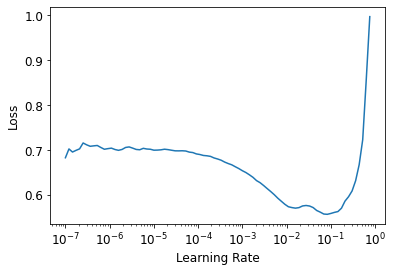

In [ ]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn.predict(img )

#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]}'
lbl_pred

Label(value="Prediction: ['Bridge']; Probability: tensor([0.9968])")

In [ ]:
learn.dls.vocab

['Bicycle', 'Bridge', 'Bus', 'Car', 'Chimney', 'Crosswalk', 'Hydrant', 'Motorcycle', 'Mountain', 'Palm', 'Traffic Light']

In [ ]:
probs

tensor([0.0196, 0.9968, 0.0108, 0.0712, 0.0244, 0.0438, 0.0282, 0.0177, 0.1211, 0.2470, 0.1927])

In [ ]:
pred_idx

tensor([False,  True, False, False, False, False, False, False, False, False, False])

In [ ]:
learn.export()